Load the required libraries

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

Load the CIFAR10 dataset


170508288/170498071 [==============================] - 2s 0us/step
Training data: (50000, 32, 32, 3), (50000, 1)
Test data: (10000, 32, 32, 3), (10000, 1)


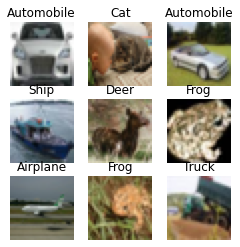

In [ ]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

print(f"Training data: {xtrain.shape}, {ytrain.shape}\nTest data: {xtest.shape}, {ytest.shape}")

fig, ax = plt.subplots(3, 3, figsize=(4, 4))

np.random.seed(543210) 
image_ids = np.random.randint(0, xtrain.shape[0], size = 9).reshape(3, 3)

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(xtrain[image_ids[i,j]])
        ax[i, j].set_title(labels[ytrain[image_ids[i,j]][0]])
        ax[i, j].axis('off')

plt.show()

# Normalize the data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# One-hot encode the labels
ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

In [ ]:
# Load VGG16
vgg16 = keras.applications.VGG16(include_top=False, 
                                 weights='imagenet', 
                                 input_shape=(32, 32, 3))

print(vgg16.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Freeze the layers up to block 3
for layer in vgg16.layers[:-8]:
    print(f"Freezing layer {layer.name}")
    layer.trainable = False

# Now we need to add our layers on top
# Create the model

model = keras.Sequential(vgg16.layers[:-4] + [keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')])

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

print(model.summary())

Freezing layer input_7
Freezing layer block1_conv1
Freezing layer block1_conv2
Freezing layer block1_pool
Freezing layer block2_conv1
Freezing layer block2_conv2
Freezing layer block2_pool
Freezing layer block3_conv1
Freezing layer block3_conv2
Freezing layer block3_conv3
Freezing layer block3_pool
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Con

In [ ]:
# Train the model
history = model.fit(xtrain, ytrain, 
                    epochs=15,
                    validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 42s 29ms/step - loss: 1.4459 - accuracy: 0.5034 - val_loss: 1.0515 - val_accuracy: 0.6444
Epoch 2/15
1407/1407 [==============================] - 41s 29ms/step - loss: 1.0040 - accuracy: 0.6695 - val_loss: 0.9309 - val_accuracy: 0.6806
Epoch 3/15
1407/1407 [==============================] - 40s 28ms/step - loss: 0.9080 - accuracy: 0.7054 - val_loss: 0.8418 - val_accuracy: 0.7148
Epoch 4/15
1407/1407 [==============================] - 41s 29ms/step - loss: 0.8430 - accuracy: 0.7261 - val_loss: 0.8212 - val_accuracy: 0.7288
Epoch 5/15
1407/1407 [==============================] - 40s 29ms/step - loss: 0.8039 - accuracy: 0.7405 - val_loss: 0.7904 - val_accuracy: 0.7470
Epoch 6/15
1407/1407 [==============================] - 39s 28ms/step - loss: 0.7619 - accuracy: 0.7552 - val_loss: 0.7957 - val_accuracy: 0.7400
Epoch 7/15
1407/1407 [==============================] - 39s 28ms/step - loss: 0.7358 - accuracy: 0.7652 - val_loss: 0.8177 -

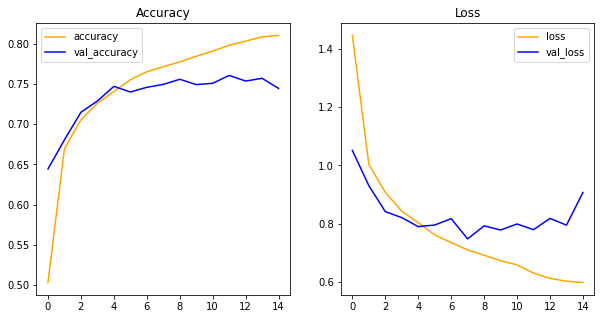

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(history.history['accuracy'], label='accuracy', c="orange")
ax[0].plot(history.history['val_accuracy'], label='val_accuracy', c="blue")
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='loss', c="orange")
ax[1].plot(history.history['val_loss'], label='val_loss', c="blue")
ax[1].set_title('Loss')
ax[1].legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the test set
predictions = model.predict(xtest)

# Check the accuracy of the model
print(confusion_matrix(np.argmax(predictions, axis=1), np.argmax(ytest, axis=1)))

[[859  20  74  25  26  14  13   7  50  30]
 [  9 816   4   9   3   6   4   2  13  48]
 [ 20   4 587  42  32  24  10   9   6   7]
 [ 18   8  59 503  49 153  24  21   5  16]
 [  7   0  69  28 537  21   6   9   2   2]
 [  1   3  37 125  19 576   7  25   2   2]
 [  6  13 112 148 149  92 915  12   8  11]
 [ 18   8  48  81 169 104   7 909   3  23]
 [ 45  49   5  17  13   4  12   2 905  51]
 [ 17  79   5  22   3   6   2   4   6 810]]
